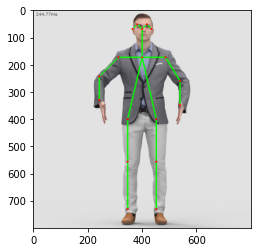

In [1]:
#this code is for static images 


import cv2 as cv
import matplotlib.pyplot as plt 

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
inWidth =368
inHeight = 368
thr = 0.2 

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

img = cv.imread("image.jpg")
#plt.imshow(img)
#plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

def pose_estimation(frame):
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5,127.5,127.5), swapRB = True , crop=False ))
  out = net.forward()
  out = out[:, :19, :, :] 

  assert(len(BODY_PARTS) == out.shape[1])

  points = []
  for i in range(len(BODY_PARTS)):
      heatMap = out[0, i, :, :]

       
      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3]
      y = (frameHeight * point[1]) / out.shape[2]
        
      points.append((int(x), int(y)) if conf > thr else None)

  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS)
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      if points[idFrom] and points[idTo]:
          cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
          cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
          cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
  return frame



estimated_image = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))




In [ ]:
#this code will take video data as input and give the output


import cv2 as cv
import matplotlib.pyplot as plt 

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
inWidth =368
inHeight = 368
thr = 0.2 

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

cap = cv.VideoCapture('Abhay_Vriksh.mp4')
cap.set(3,800)
cap.set(4,800)

if not cap.isOpened():
  cap = cv.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open the video")

while cv.waitKey(1) < 0:
  hasFrame,frame = cap.read()
  if not hasFrame:
    cv.waitKey()
    break

  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5,127.5,127.5), swapRB = True , crop=False ))
  out = net.forward()
  out = out[:, :19, :, :] 

  assert(len(BODY_PARTS) == out.shape[1])

  points = []
  for i in range(len(BODY_PARTS)):
      heatMap = out[0, i, :, :]

       
      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3]
      y = (frameHeight * point[1]) / out.shape[2]
        
      points.append((int(x), int(y)) if conf > thr else None)

  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS)
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      if points[idFrom] and points[idTo]:
          cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
          cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
          cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

 # cv.imshow('Pose estimation tutorial', frame)
  cv.imshow("hello", frame)

In [ ]:
#this code will work with live webcam

import cv2 as cv
import matplotlib.pyplot as plt 

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
inWidth =368
inHeight = 368
thr = 0.2 

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]
    
    
    
cap = cv.VideoCapture(1)
cap.set(cv.CAP_PROP_FPS, 11)
cap.set(3,800)
cap.set(4,800)

if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open the webcam")

while cv.waitKey(1) < 0:
    hasFrame,frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5,127.5,127.5), swapRB = True , crop=False ))
    out = net.forward()
    out = out[:, :19, :, :] 

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]

        
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
          
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

  # cv.imshow('Pose estimation tutorial', frame)
    cv.imshow("trial", frame)